<div class="usecase-title"> Impact of employment on housing prices </div>

<div class="usecase-authors"><b>Authored by: Manasa Nagaraja</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python</div>
</div>

<h2>Scenario </h2>
<div>In the busy city of Melbourne, urban planners and policymakers are constantly seeking insights into the complex dynamics between employment patterns and housing markets. With the City of Melbourne's Census of Land Use and Employment (CLUE) dataset at their disposal, they start on a mission to delve deep into this relationship.

Armed with the "Jobs per ANZSIC for blocks" dataset, which provides detailed employment data across various industries and geographical areas, the team sets out to uncover correlations with house prices by small area. My aim is clear to understand how fluctuations in employment levels within different ANZSIC industries impact housing prices in Melbourne's diverse neighborhoods.

As I have to analyze the data, patterns begin to emerge and observe that certain industries, such as technology or finance, exhibit a strong influence on nearby housing prices, driving up demand and property values. On the other hand, fluctuations in employment levels within other industries may have a lesser impact or even a negative correlation with house prices.

With these insights, urban planners gain a deeper understanding of the factors shaping Melbourne's housing market. Armed with data-driven evidence, I can modify urban development strategies to contribute to economic growth, ensure housing affordability, and create vibrant, sustainable communities for Melbourne's residents.</div>

<h3>What this use case will teach you ?</h3>

At the end of this use case you will:
*  I will learn how to merge and clean datasets from different sources,
   ensuring data consistency for analysis.
*  Performing Exploratory Data Analysis I will learn to understand the
   structure of the data, identify patterns, and uncover relationships between variables.
*  I will gain experience in assessing the correlation between
  employment trends across various industries and house prices in different areas, using statistical techniques.
*  This use case will provide an opportunity to apply statistical methods
  to analyze the data, such as hypothesis testing and regression analysis, to draw meaningful conclusions.
*  I am Planning to upskill with machine learning to explore machine learning algorithms to predict house prices based on employment data and other factors, enhancing your understanding of predictive modeling techniques.
*  By analysing the impact of employment on housing prices, I will gain insights into urban planning considerations and the economic dynamics of melbourne areas.


<h3>Introduction</h3>

In this project, I will be analyzing the relationship between employment trends and housing prices within the City of Melbourne. By searching into datasets provided by the City of Melbourne, I aim to understand how fluctuations in employment across different industries impact the housing market. This analysis holds significant implications for urban planning, economic development, within Melbourne. The datasets include information on employment levels categorized by industry (ANZSIC codes) and housing prices by small area.
Employment patterns have a great influence on housing demand and property prices. Changes in employment levels within specific industries can lead to shifts in population demographics, housing preferences, and overall market dynamics. Understanding these correlations is essential for urban planners, and stakeholders to make informed decisions regarding housing affordability, workforce development, and infrastructure planning.

Through this project, I would like to understand the insights of the relation between employment and housing markets. By leveraging data science techniques, statistical analysis, and machine learning algorithms, I aim to identify patterns, trends, and correlations that can inform strategic decision-making processes. Ultimately, my goal is to contribute to the creation of smarter, gain deeper insights into the dynamics of cities, and identify the areas for improvement, and develop innovative solutions to advance inclusive and strong communities.

<h4>Dataset List</h4>

*   Jobs per ANZSIC for blocks
*   House Prices by Small Area - Sale Year

<h4> Contents </h4>

*   Import important Libraries
*   Connect, Test and Analysis of Datasets







In [77]:
# Standard
import os
import json
import io
# Data import
import requests

# Data manipulation
import pandas as pd
import seaborn as sns
from scipy import stats
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.svm import SVR
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV


In [78]:
def download_and_load_csv(url):
    response = requests.get(url)
    csv_string = response.content.decode('utf-8')
    df = pd.read_csv(io.StringIO(csv_string))
    return df

# API Link
download_link_1 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/employment-by-block-by-anzsic/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C'

# Use functions to download and load data
df = download_and_load_csv(download_link_1)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12394 entries, 0 to 12393
Data columns (total 23 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Census year                                      12394 non-null  int64  
 1   Block ID                                         12394 non-null  int64  
 2   CLUE small area                                  12394 non-null  object 
 3   Accommodation and Food Services                  9554 non-null   float64
 4   Administrative and Support Services              10373 non-null  float64
 5   Agriculture, Forestry and Fishing                12099 non-null  float64
 6   Arts and Recreation Services                     8465 non-null   float64
 7   Construction                                     10319 non-null  float64
 8   Education and Training                           9841 non-null   float64
 9   Electricity, Gas, Water and 

In [80]:
display(df)

,Census year,Block ID,CLUE small area,Accommodation and Food Services,Administrative and Support Services,"Agriculture, Forestry and Fishing",Arts and Recreation Services,Construction,Education and Training,"Electricity, Gas, Water and Waste Services",...,Manufacturing,Mining,Other Services,"Professional, Scientific and Technical Services",Public Administration and Safety,"Rental, Hiring and Real Estate Services",Retail Trade,"Transport, Postal and Warehousing",Wholesale Trade,Total jobs in block
0,2018,1101,Docklands,565.0,38.0,0.0,6.0,0.0,0.0,2092.0,...,NaN,0.0,209.0,0.0,NaN,54.0,878.0,632.0,0.0,6970.0
1,2018,1107,Docklands,NaN,0.0,0.0,5.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,126.0
2,2018,1109,Docklands,437.0,170.0,NaN,3.0,37.0,27.0,NaN,...,NaN,0.0,108.0,433.0,11.0,142.0,60.0,118.0,48.0,1758.0
3,2018,1110,Docklands,203.0,NaN,0.0,246.0,62.0,NaN,NaN,...,NaN,0.0,25.0,NaN,0.0,21.0,610.0,0.0,0.0,2118.0
4,2018,1111,West Melbourne (Industrial),0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,253.0,0.0,253.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12389,2006,551,Kensington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12390,2006,553,Kensington,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
12391,2006,554,Kensington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12392,2006,555,Kensington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
df.drop(["Block ID","Accommodation and Food Services","Administrative and Support Services","Agriculture, Forestry and Fishing","Arts and Recreation Services",
         "Construction","Education and Training","Electricity, Gas, Water and Waste Services","Financial and Insurance Services","Health Care and Social Assistance",
         "Information Media and Telecommunications","Manufacturing","Mining","Other Services","Professional, Scientific and Technical Services","Public Administration and Safety",
         "Rental, Hiring and Real Estate Services","Retail Trade","Transport, Postal and Warehousing","Wholesale Trade"
       ], axis=1, inplace=True)

In [82]:
df3 = pd.DataFrame(df)

# Convert 'Census year' column to datetime format
df3['Census year'] = pd.to_datetime(df3['Census year'], format='%Y')

# Filter data to keep only years till 2016
df_filtered = df3[df3['Census year'].dt.year <= 2016]

# Print the filtered DataFrame
display(df_filtered)

,Census year,CLUE small area,Total jobs in block
215,2016-01-01,Melbourne (CBD),15.0
216,2016-01-01,Melbourne (CBD),718.0
217,2016-01-01,Melbourne (CBD),4572.0
218,2016-01-01,Melbourne (CBD),3991.0
219,2016-01-01,Melbourne (CBD),2168.0
...,...,...,...
12389,2006-01-01,Kensington,0.0
12390,2006-01-01,Kensington,NaN
12391,2006-01-01,Kensington,0.0
12392,2006-01-01,Kensington,0.0


In [83]:
df5 = pd.DataFrame(df_filtered)

# Filter data to keep only rows where 'CLUE small area' is neither 'City of Melbourne' nor 'West Melbourne (Residential)'
df_filtered2 = df5[~df5['CLUE small area'].isin(['City of Melbourne (total)', 'West Melbourne (Industrial)'])]

# Print the filtered DataFrame
print(df_filtered2)

      Census year  CLUE small area  Total jobs in block
215    2016-01-01  Melbourne (CBD)                 15.0
216    2016-01-01  Melbourne (CBD)                718.0
217    2016-01-01  Melbourne (CBD)               4572.0
218    2016-01-01  Melbourne (CBD)               3991.0
219    2016-01-01  Melbourne (CBD)               2168.0
...           ...              ...                  ...
12389  2006-01-01       Kensington                  0.0
12390  2006-01-01       Kensington                  NaN
12391  2006-01-01       Kensington                  0.0
12392  2006-01-01       Kensington                  0.0
12393  2006-01-01       Kensington                  5.0

[8547 rows x 3 columns]


In [84]:
# Rename columns
melbourne_job = df_filtered2.rename(columns={"Census year": "Year",
                                  "CLUE small area": "Region"})

In [85]:
display(melbourne_job)

,Year,Region,Total jobs in block
215,2016-01-01,Melbourne (CBD),15.0
216,2016-01-01,Melbourne (CBD),718.0
217,2016-01-01,Melbourne (CBD),4572.0
218,2016-01-01,Melbourne (CBD),3991.0
219,2016-01-01,Melbourne (CBD),2168.0
...,...,...,...
12389,2006-01-01,Kensington,0.0
12390,2006-01-01,Kensington,NaN
12391,2006-01-01,Kensington,0.0
12392,2006-01-01,Kensington,0.0


In [86]:
melbourne_job.shape

(8547, 3)

Checking and Handling missing values.

<h3>Jobs per ANZSIC for blocks</h3>

In [87]:
# Check for missing values in the melbourne_job DataFrame
melbourne_job.isna().sum()

Year                      0
Region                    0
Total jobs in block    1905
dtype: int64

In [88]:
# Remove rows with missing values from the melbourne_job DataFrame
melbourne_job.dropna(inplace = True)

In [89]:
melbourne_job.isna().sum()

Year                   0
Region                 0
Total jobs in block    0
dtype: int64

The above code performs several data processing and cleaning steps on a dataset Jobs per ANZSIC for blocks and  by importing necessary libraries and download_and_load_csv function s then used to download data from a specific API link related to employment data in Melbourne.After downloading the data, several columns representing different sectors of employment are dropped using the drop method.The 'Census year' column is converted to datetime format using pd.to_datetime and Data is filtered to keep only rows with census years until 2016 using boolean indexing.Another filter is applied to exclude rows where the 'CLUE small area' is either 'City of Melbourne (total)' or 'West Melbourne Industrial and the range and meaning of values in different columns such as 'Census year', 'Block ID', 'CLUE small area', and the employment sectors.

In [90]:
# data set name
download_link_2 = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/house-prices-by-small-area-sale-year/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C'

df1 = download_and_load_csv(download_link_2)

In [91]:
df7 = pd.DataFrame(df1)

df_filtered4 = df7[df7['Small_Area'] != 'NA']

# Print the resulting DataFrame
print(df_filtered4)

     Sale_Year                    Small_Area                   Type  \
0         2000                       Carlton        House/Townhouse   
1         2000                       Carlton  Residential Apartment   
2         2000                East Melbourne        House/Townhouse   
3         2000                East Melbourne  Residential Apartment   
4         2000                    Kensington        House/Townhouse   
..         ...                           ...                    ...   
342       2016                     Docklands        House/Townhouse   
343       2016               North Melbourne        House/Townhouse   
344       2016                   South Yarra  Residential Apartment   
345       2016  West Melbourne (Residential)  Residential Apartment   
346       2016                           NaN  Residential Apartment   

     Median_Price  Transaction_Count  
0        316250.0                116  
1        220000.0                309  
2        622500.0             

In [92]:
df_filtered4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sale_Year          347 non-null    int64  
 1   Small_Area         340 non-null    object 
 2   Type               347 non-null    object 
 3   Median_Price       319 non-null    float64
 4   Transaction_Count  347 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 13.7+ KB


In [93]:
df_filtered4.head()

,Sale_Year,Small_Area,Type,Median_Price,Transaction_Count
0,2000,Carlton,House/Townhouse,316250.0,116
1,2000,Carlton,Residential Apartment,220000.0,309
2,2000,East Melbourne,House/Townhouse,622500.0,42
3,2000,East Melbourne,Residential Apartment,295000.0,139
4,2000,Kensington,House/Townhouse,215250.0,258


Checking and Handling missing values.

<h3> for House Prices by Small Area - Sale Year dataset</h3>

In [94]:
# Check for missing values in the df_filtered4 DataFrame
df_filtered4.isnull().any()

Sale_Year            False
Small_Area            True
Type                 False
Median_Price          True
Transaction_Count    False
dtype: bool

In [95]:
# Check for missing values in the df_filtered4 DataFrame
df_filtered4.isna().sum()

Sale_Year             0
Small_Area            7
Type                  0
Median_Price         28
Transaction_Count     0
dtype: int64

In [96]:
# Remove rows with missing values from the df_filtered4 DataFrame
df_filtered4.dropna(inplace = True)

In [97]:
df_filtered4.isna().sum()

Sale_Year            0
Small_Area           0
Type                 0
Median_Price         0
Transaction_Count    0
dtype: int64

In [98]:
df_filtered4.isnull().any()

Sale_Year            False
Small_Area           False
Type                 False
Median_Price         False
Transaction_Count    False
dtype: bool

In [99]:
# Rename columns
houseprice_melbourne = df_filtered4.rename(columns={"Sale_Year": "Year",
                                  "Small_Area": "Region","Type":"House_type","Median_price":"House_price",})

In [100]:
# Check duplicate rows
houseprice_melbourne[houseprice_melbourne.duplicated()]


,Year,Region,House_type,Median_Price,Transaction_Count


In [101]:
houseprice_melbourne.drop_duplicates(inplace=True)

The above code performs several data processing and cleaning steps on a dataset House Prices by Small Area - Sale Year and by importing necessary libraries and download_and_load_csv function s then used to download data from a specific API link related to house prices by small area in Melbourne.After craeting a dataframe we filter out rows where the 'Small_Area' column is not equal to 'NA' using boolean indexing and the Missing values are checked, dropped, and checked again, Columns are renamed to improve clarity and consistency and The code checks for duplicate rows in the DataFrame based on all columns and if any duplicates are found, they are dropped from the DataFrame.

(EDA) - Exploratory Data Analysis for Jobs per ANZSIC for blocks and House Prices by Small Area - Sale Year

In [102]:
melbourne_job.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6642 entries, 215 to 12393
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year                 6642 non-null   datetime64[ns]
 1   Region               6642 non-null   object        
 2   Total jobs in block  6642 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 207.6+ KB


Now lets analyze the distribution and outliers in the "Total jobs in block" column of the melbourne_job DataFrame.

<ipython-input-103-1c23928f2ceb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(melbourne_job["Total jobs in block"], fit=norm)


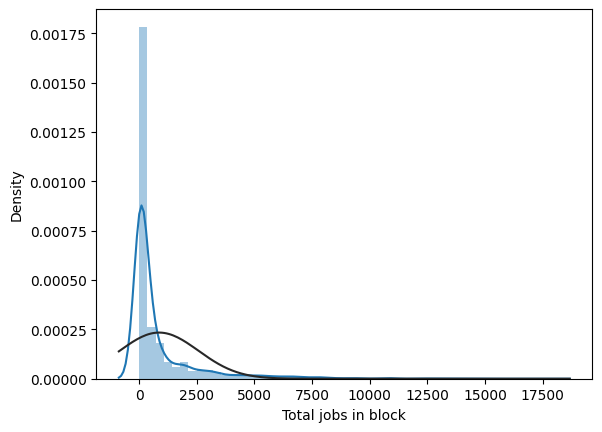

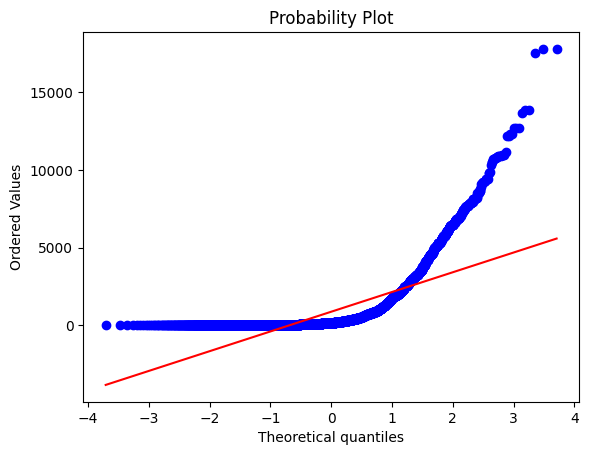

In [103]:
#Add headers before each part/chart so that the user can follow easier
sns.distplot(melbourne_job["Total jobs in block"], fit=norm)
fig = plt.figure()
prob = stats.probplot(melbourne_job["Total jobs in block"], plot=plt)

For the analysis performed the visualization of the distribution of a dataset called "Total jobs in block" along with a probability plot.
*   The distribution plot, created with the function sns.distplot,  shows the probability density of the data. The x-axis represents the number of jobs in a block, while the y-axis represents the density. The curve depicts a bell-shaped distribution, which suggests that the data is normally distributed. The line superimposed on the curve is the probability density function (PDF) of a normal distribution that has been fitted to the data. This line helps to assess how well the normal distribution fits the data.
*   The probability plot, created with the function stats.probplot, shows how well the data follows a normal distribution. The x-axis represents the ordered values from the data set, while the y-axis represents the expected cumulative probability values for a normal distribution and in the distribution the points deviate slightly from a straight line, which shows that the data may not be perfectly normal.

In [104]:
# Value < Q1 - 1,5*IQR OR Value > Q3 + 1,5 * IQR
def finding_outliers(data, variable_name) :
    iqr = data[variable_name].quantile(0.75) - data[variable_name].quantile(0.25)
    lower =  data[variable_name].quantile(0.25) -1.5*iqr
    upper =  data[variable_name].quantile(0.75) + 1.5*iqr
    return data [(data[variable_name] < lower) | (data[variable_name] > upper)]

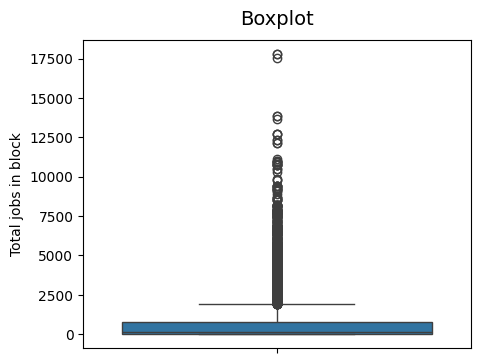

In [105]:
plt.figure(figsize=(5, 4))
plt.text(0.5, 1.05, "Boxplot", ha='center', fontsize=14, transform=plt.gca().transAxes)
sns.boxplot(y="Total jobs in block", data=melbourne_job)

plt.show()

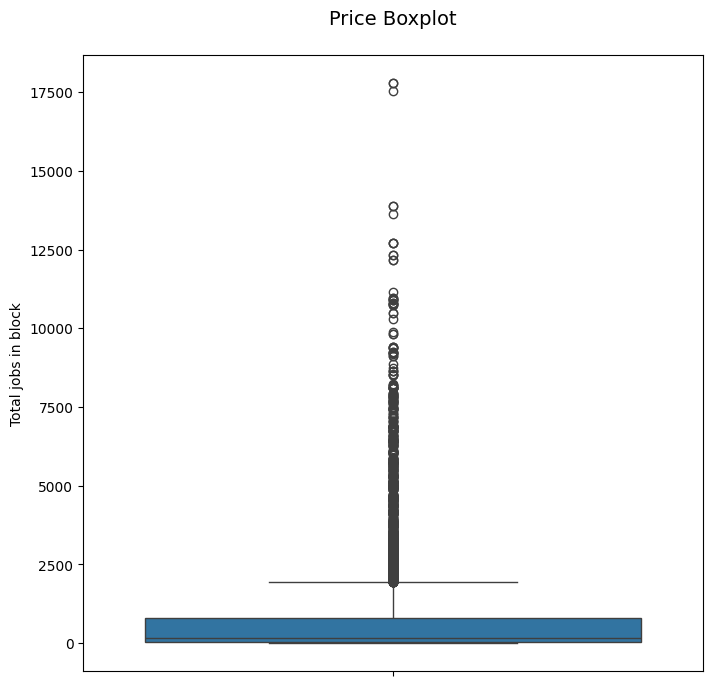

In [106]:

# Function to find outliers
def finding_outliers(data, variable_name):
    iqr = data[variable_name].quantile(0.75) - data[variable_name].quantile(0.25)
    lower = data[variable_name].quantile(0.25) - 1.5 * iqr
    upper = data[variable_name].quantile(0.75) + 1.5 * iqr
    return data[(data[variable_name] < lower) | (data[variable_name] > upper)]


# Price boxplot
plt.figure(figsize=(8, 8))
plt.text(0.5, 1.05, "Price Boxplot", ha='center', fontsize=14, transform=plt.gca().transAxes)
sns.boxplot(y="Total jobs in block", data=melbourne_job)

plt.show()


For the box plot we defines a function called finding_outliers that can be used to identify outliers in a dataset.
*   First we calculate the interquartile range (IQR) of the variable by subtracting the value at the 25th percentile (Q1) from the value at the 75th percentile (Q3) and then define two thresholds for outliers. These thresholds are based on the IQR.
*  By creating a boxplot of the total jobs in block we can visualize the distribution of the data and identify outliers and boxplots shows the quartiles (Q1, Q3) and the median (Q2) of the data. The whiskers extend from the box to data points within 1.5 IQRs of the quartiles. Data points further than 1.5 IQRs from the quartiles are considered outliers and plotted as individual points.

<ipython-input-107-c3b914a8343c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Region", y="Total jobs in block", data=melbourne_job, palette="Set3")


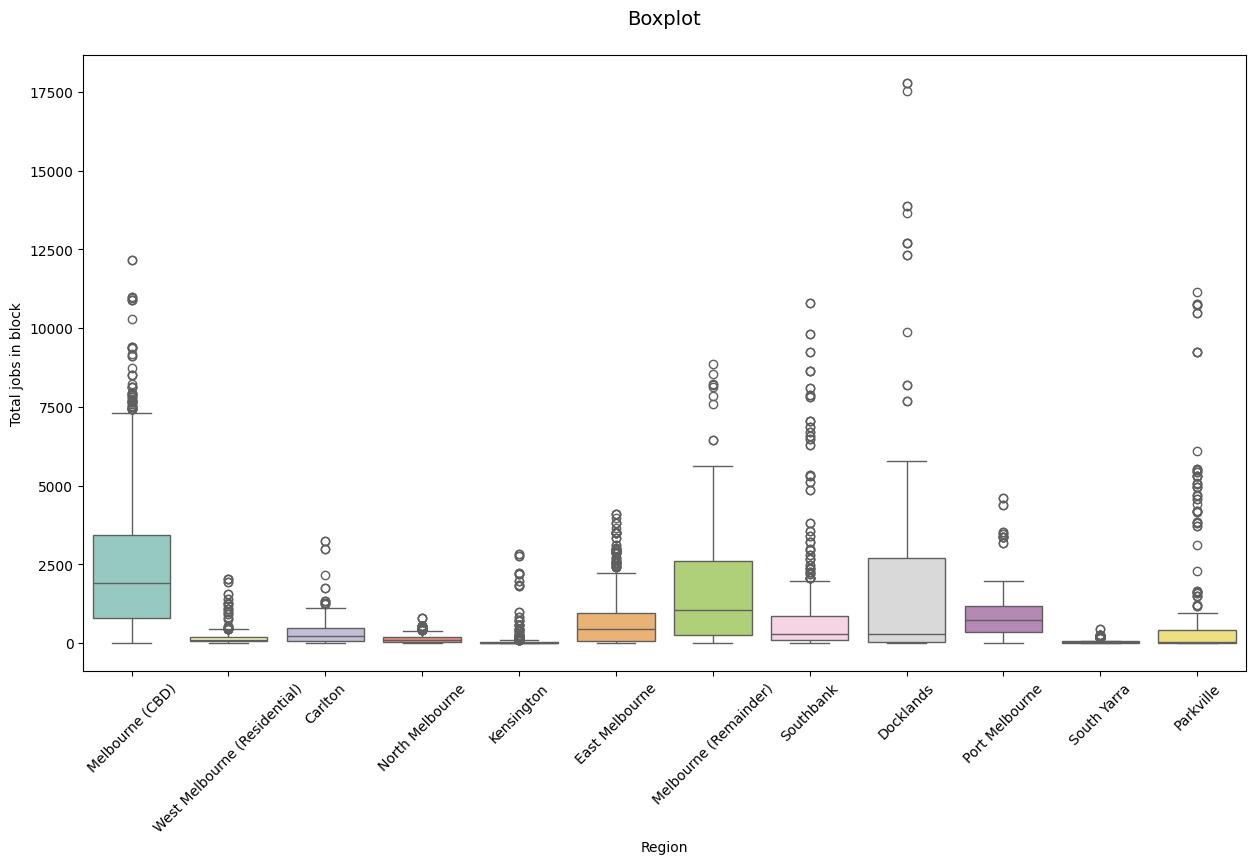

In [107]:
# Boxplot with rotated x-labels
plt.figure(figsize=(15, 8))
plt.text(0.5, 1.05, "Boxplot", ha='center', fontsize=14, transform=plt.gca().transAxes)
sns.boxplot(x="Region", y="Total jobs in block", data=melbourne_job, palette="Set3")
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.show()

The boxplot you provided visualizes the distribution of "Total jobs in block" across different regions.  By looking at the plot, you can see how the median and IQR vary across regions. You can also identify any outliers for each region.The x axis show the distribution of "Total jobs in block" for each region and y axis set to "Total jobs in block" and the plot shows the interquartile range (IQR) of the data, which is the range between the first quartile (Q1) and the third quartile (Q3). The line in the middle of the box represents the median (Q2) of the data. The whiskers extend from the box to data points within 1.5 IQRs of the quartiles. Data points further than 1.5 IQRs from the quartiles are considered outliers and plotted as individual points.

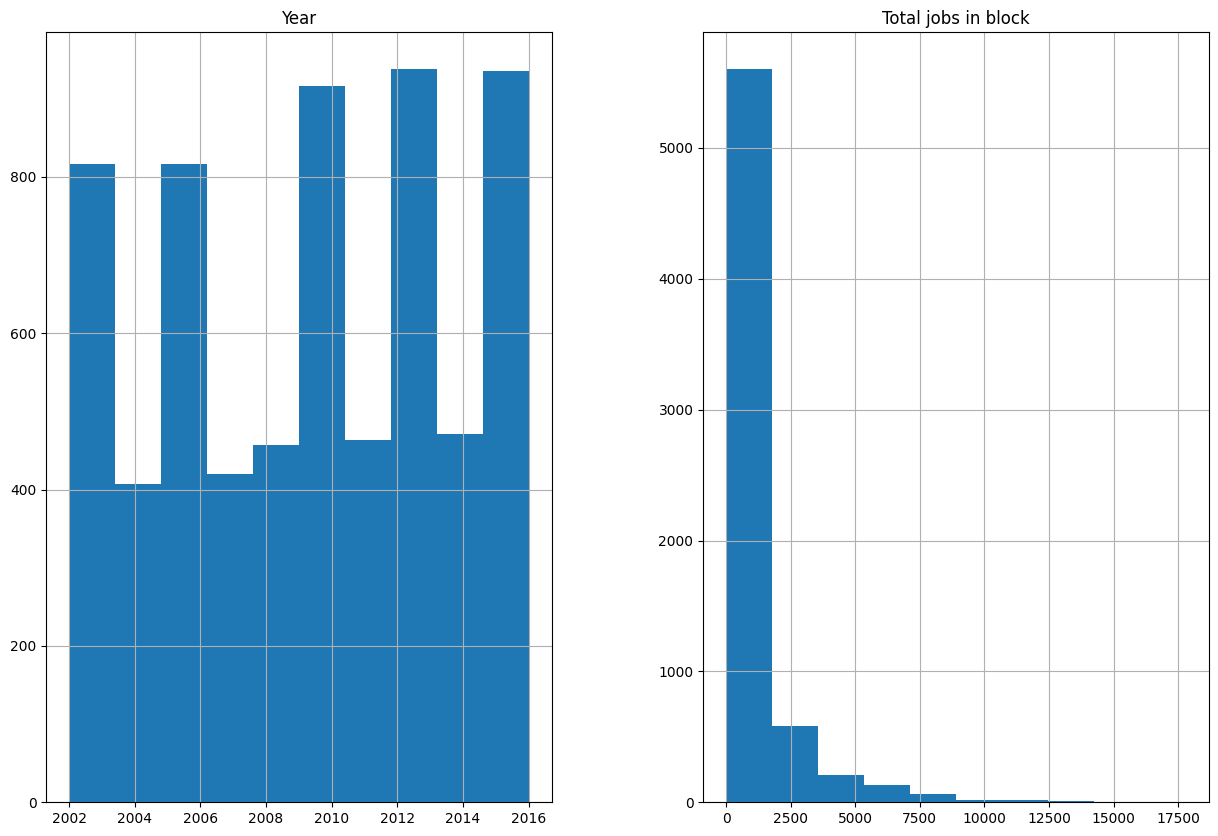

In [108]:
melbourne_job.hist(figsize=(15, 10))
plt.show()

The histogram of the variable shows the "Total jobs in block" in the "melbourne_job" dataset where the x-axis shows the number of jobs in a block, while the y-axis shows the number of listings in the dataset that have that number of jobs and  according to the plot, there seem to be more job listings with a value in the range of 2000 to 2500 total jobs in block compared to listings with a value in the range of 1000 to 1500 total jobs in block. and The histogram  appears to be bell-shaped, which shows that the data is normally distributed. A normal distribution is a symmetrical distribution that resembles a bell curve

<ipython-input-109-3a639717183a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x="Region", data=melbourne_job,palette="Set3")
<ipython-input-109-3a639717183a>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)


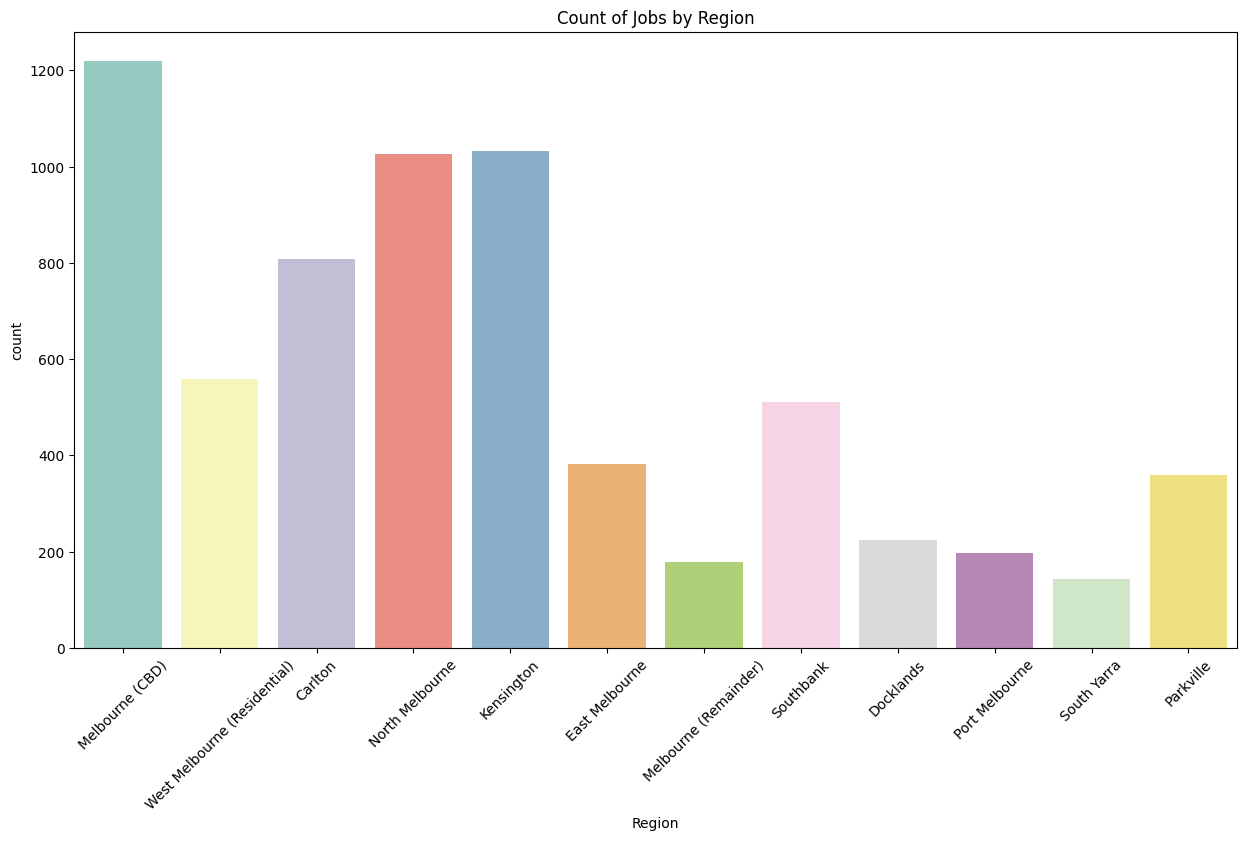

In [109]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x="Region", data=melbourne_job,palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = 45)
plt.title("Count of Jobs by Region")
plt.show()


A bar chart titled count of regions in melbourne job data. The x-axis shows the regions in Melbourne. The y-axis shows the number of jobs. The most common region is Melbourne (CBD) with over 1400 jobs. Other regions include West Melbourne (Residential), Carlton, North Melbourne, South Yarra, and Parkville





(EDA) - Exploratory Data Analysis for House Prices by Small Area - Sale Year

In [110]:
houseprice_melbourne.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316 entries, 0 to 345
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               316 non-null    int64  
 1   Region             316 non-null    object 
 2   House_type         316 non-null    object 
 3   Median_Price       316 non-null    float64
 4   Transaction_Count  316 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 14.8+ KB


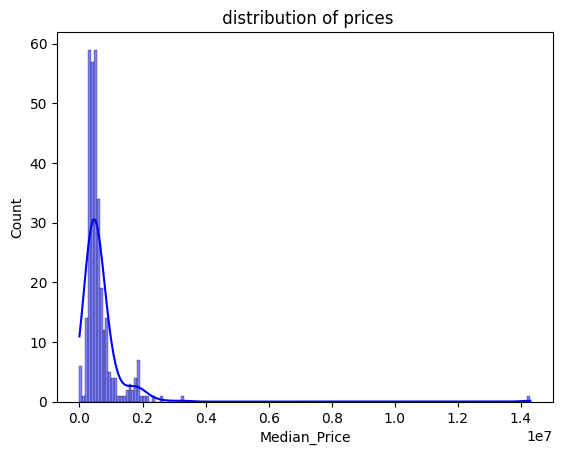

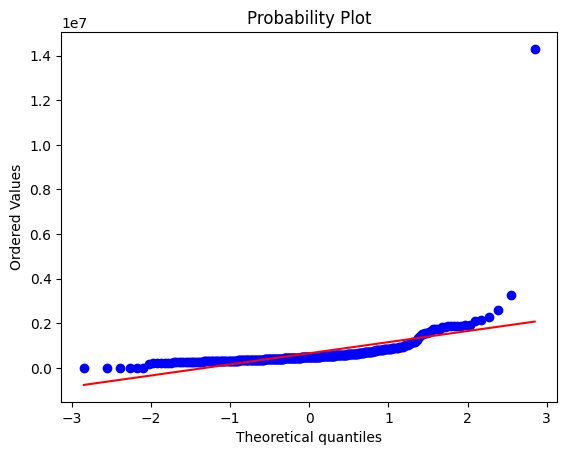

In [111]:
# Plotting the distribution of prices
sns.histplot(data=df_filtered4["Median_Price"], kde=True, color="blue" )
plt.title(" distribution of prices")
plt.show()


# Creating a probability plot
fig = plt.figure()
prob = stats.probplot(df_filtered4["Median_Price"], plot=plt)
plt.show()

For the above analysis performed visualization of the distribution of a dataset called "Median_Price" along with a probability plot.
*  The distribution plot, created with the function sns.histplot, shows the probability density of the dataThe x-axis represents the median price, while the y-axis represents the density. The curve depicts a distribution, and the line superimposed on the curve is the probability density function (PDF) of a normal distribution that has been fitted to the data.
*  The probability plot, created with the function stats.probplot, shows how well the data follows a normal distribution. The x-axis represents the ordered values from the data set, while the y-axis represents the expected cumulative probability values for a normal distribution and the points deviate slightly from a straight line, which suggests that the data may not be perfectly normal. However, the deviation is minor, so it is likely that the normal distribution is a reasonable approximation for the data.




<Axes: ylabel='Median_Price'>

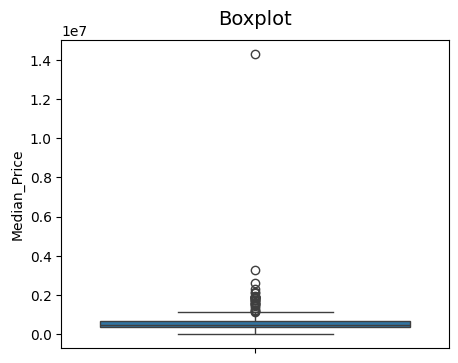

In [112]:
plt.figure(figsize=(5,4))
plt.text(0.5, 1.05, "Boxplot", ha='center', fontsize=14, transform=plt.gca().transAxes)
sns.boxplot(y="Median_Price", data=houseprice_melbourne)


<Axes: ylabel='Median_Price'>

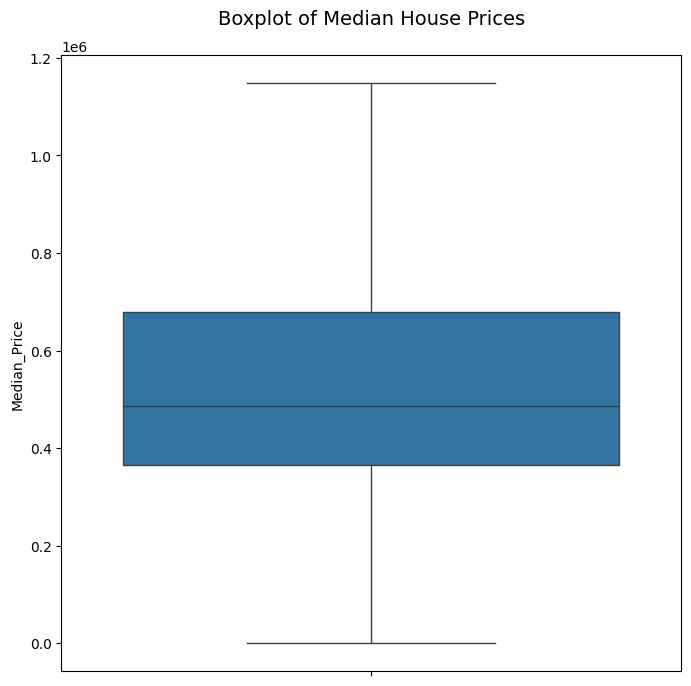

In [113]:
finding_outliers(houseprice_melbourne, "Median_Price").sort_values("Median_Price")

# For price
iqr_price = houseprice_melbourne["Median_Price"].quantile(0.75) - houseprice_melbourne["Median_Price"].quantile(0.25)
houseprice_melbourne["Median_Price"].quantile(0.75) + 1.5 * iqr_price
houseprice_melbourne.loc[(finding_outliers(houseprice_melbourne, "Median_Price").index, "Median_Price")] = houseprice_melbourne["Median_Price"].quantile(0.75) + 1.5 * iqr_price

# Price boxplot
plt.figure(figsize=(8,8))
plt.text(0.5, 1.05, "Boxplot of Median House Prices", ha='center', fontsize=14, transform=plt.gca().transAxes)
sns.boxplot(y="Median_Price", data=houseprice_melbourne)

For the box plot it visualize and treat outliers in a dataset named "houseprice_melbourne" which contains information about house prices in Melbourne.The outlier values in the "Median_Price" column is replaced with the upper threshold for outliers, effectively treating the outliers by setting them to the maximum value within the IQR range and in the above plot it finds outliers in the median house price data, treats the outliers using winsorization, and visualizes the distribution of the data before and after treating outliers using boxplots

<ipython-input-114-80c41d38d753>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Median_Price", y="Region", data=houseprice_melbourne,palette="Set3")


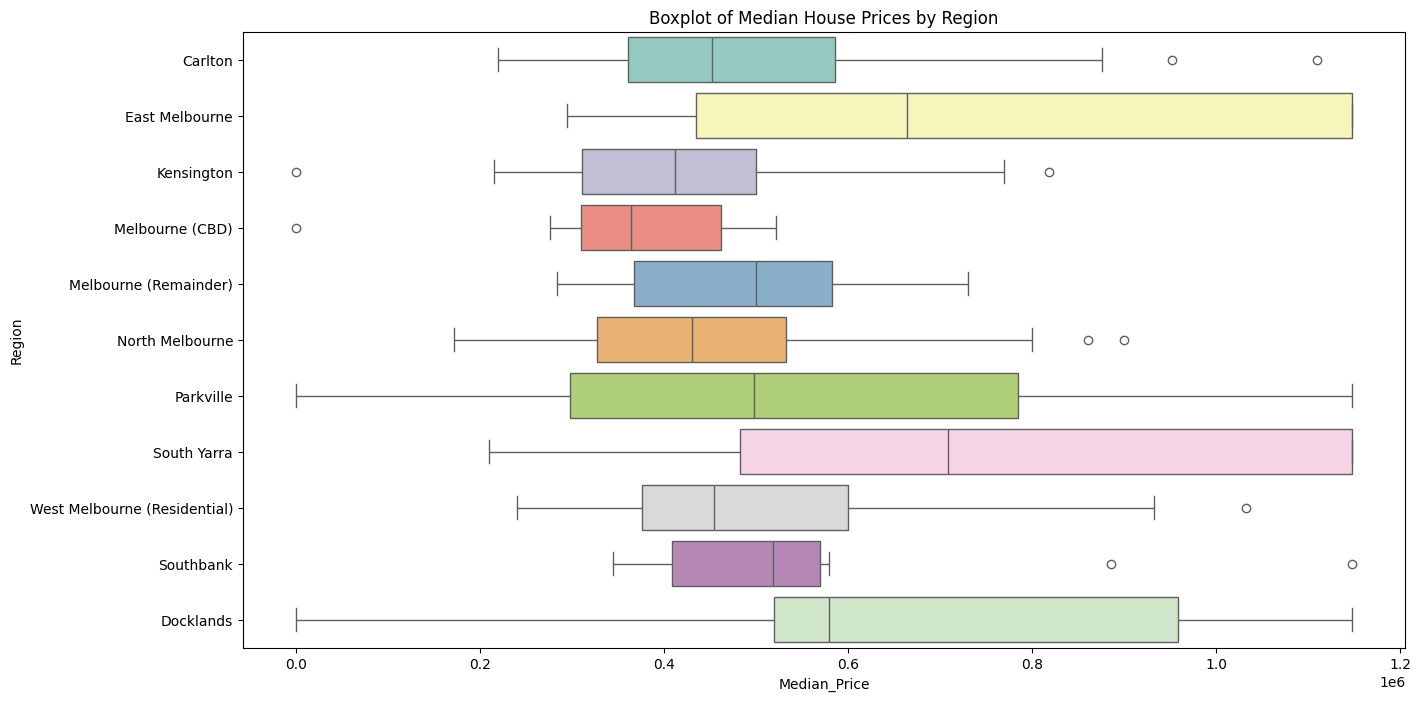

In [114]:
plt.figure(figsize=(15,8))
sns.boxplot(x="Median_Price", y="Region", data=houseprice_melbourne,palette="Set3")
plt.title("Boxplot of Median House Prices by Region")
plt.show()

The box plot created with sns.boxplot and shows the median house price of houses in Melbourne by region.
x-axis represents the different regions in Melbourne and y-axis represents the median house price. The scale goes from 0 to around 1.2 million.
*   Docklands appears to have the highest median house price, followed by South Yarra and Melbourne (CBD)
*   Some regions, like West Melbourne (Residential) and Carlton, have a wider range of house prices as indicated by the larger size of their boxes. This suggests a higher variability in house prices within these regions.
*   There are a few outliers, which could be due to particularly expensive or inexpensive houses in those regions.
*  This plot helps to identify regions with generally more expensive or affordable houses, along with the range of prices within each region.




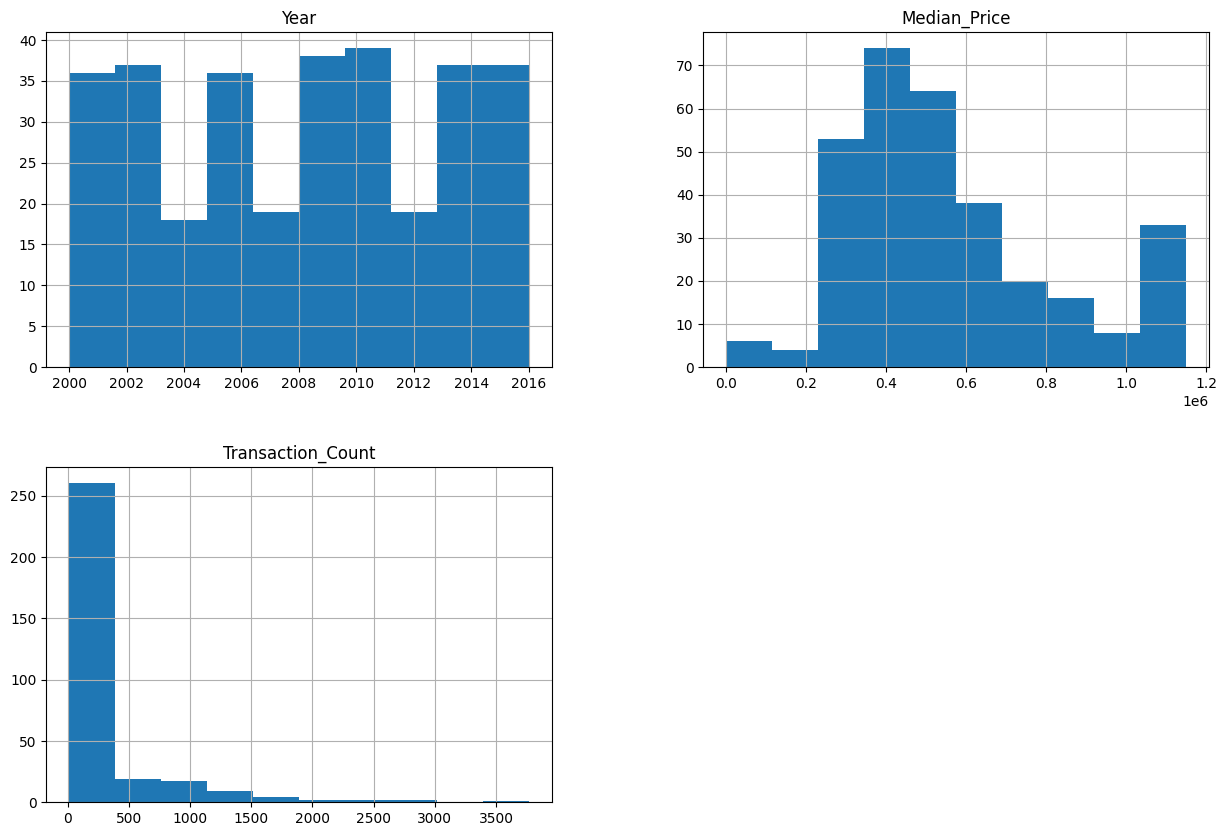

In [115]:
houseprice_melbourne.hist(figsize=(15, 10))
plt.show()

The histogram of the variable shows the "Median_Price" variable in the "houseprice_melbourne" dataset.The x-axis shows the median house price, while the y-axis shows the number of houses in the dataset that have that median price,In the plot, there seems to be a concentration of houses in the price range of 500,000 to 700,000, with fewer houses outside that range.
The histogram appears to be right-skewed, which means that there are more houses towards the lower end of the price range and the tail of the distribution extends towards the higher end. This suggests that most houses in the dataset are priced below a certain threshold, but there are also some very expensive houses.

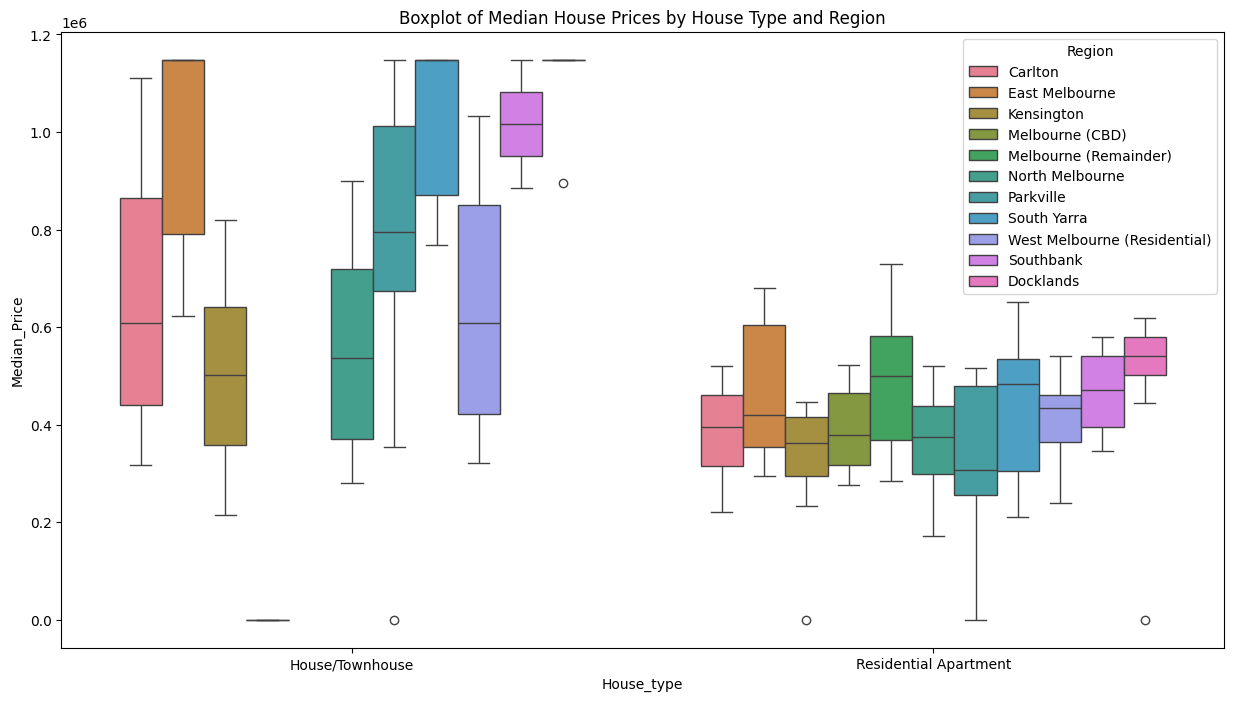

In [116]:
#plt.figure(figsize=(15,8))
plt.figure(figsize=(15,8))
sns.boxplot(x="House_type", y="Median_Price", hue="Region", data=houseprice_melbourne)
plt.title("Boxplot of Median House Prices by House Type and Region")
plt.show()

The aboce plot appears to be a visualization of the median house price for different house types across various regions in Melbourne. It was created with sns.boxplot from seaborn.

*   x-axis represents the house type - House/Townhouse or Residential Apartment and y-axis Y-axis represents the median house price. The scale goes from 0 to around 1.2 million and Each box represents the distribution of the median house price for a particular house type within a region.
*  From the plot houses/townhouses tend to have a higher median price compared to residential apartments across all regions.
*   There is a significant variation in the median house price across different regions, regardless of house type.Docklands appears to have the highest median house price for both house types, followed by South Yarra and Melbourne (CBD).
*   Region Carlton appears to have a wider range of house prices for houses/townhouses compared to Docklands.
*   This box plot helps to identify trends and potential outliers in the data.









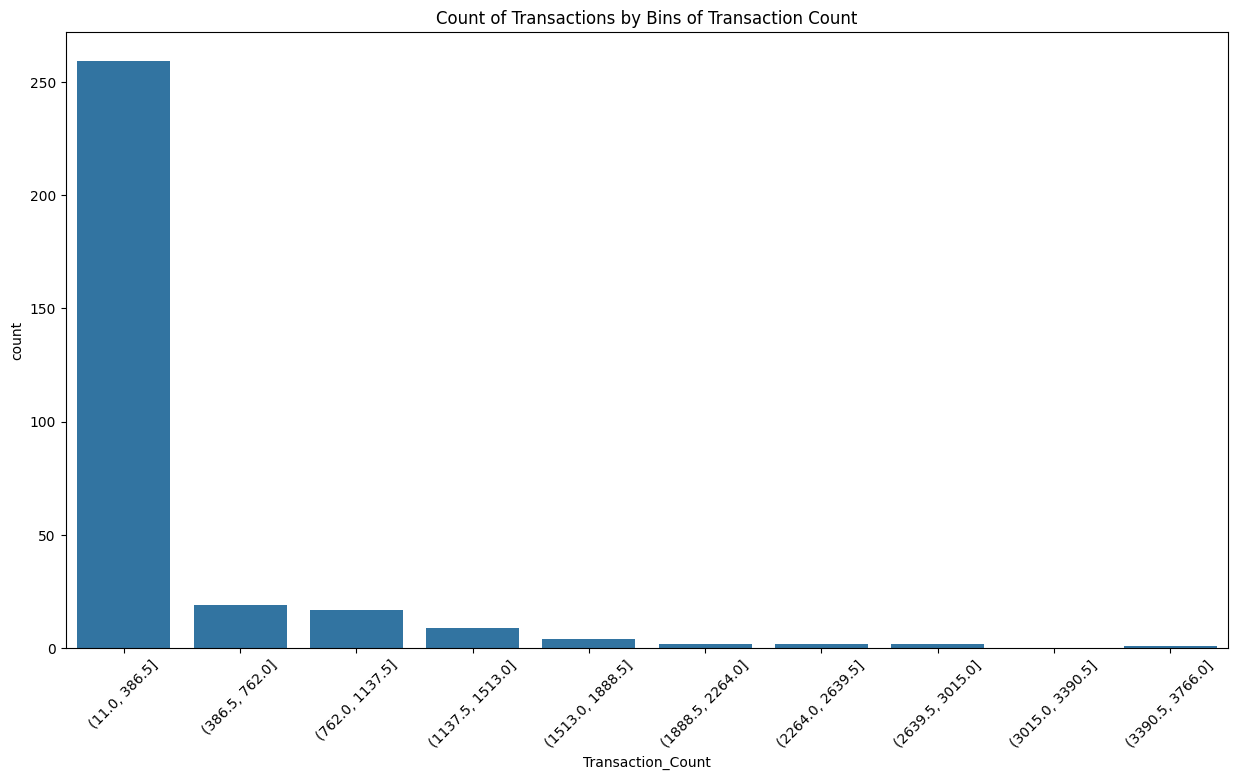

In [117]:
num_bins = 10

# Define the bin edges using numpy's linspace function
bin_edges = np.linspace(houseprice_melbourne['Transaction_Count'].min(), houseprice_melbourne['Transaction_Count'].max(), num_bins+1)

# Create the count plot with specified bins
plt.figure(figsize=(15, 8))
sns.countplot(x=pd.cut(houseprice_melbourne['Transaction_Count'], bins=bin_edges), data=houseprice_melbourne)

# Rotate x-axis labels for better visibility if necessary
plt.xticks(rotation=45)

plt.title("Count of Transactions by Bins of Transaction Count")

plt.show()



The above plot generates a countplot to visualize the distribution of the number of house transactions in the "houseprice_melbourne" dataset.
The The countplot generated is a bar chart that shows the number of houses that have a certain number of transactions. The x-axis shows the transaction count bins, and the y-axis shows the number of houses in each bin and from the plot there seem to be more houses with a transaction count between 1137 and 1513 compared to houses with a transaction count between 250 and 500.


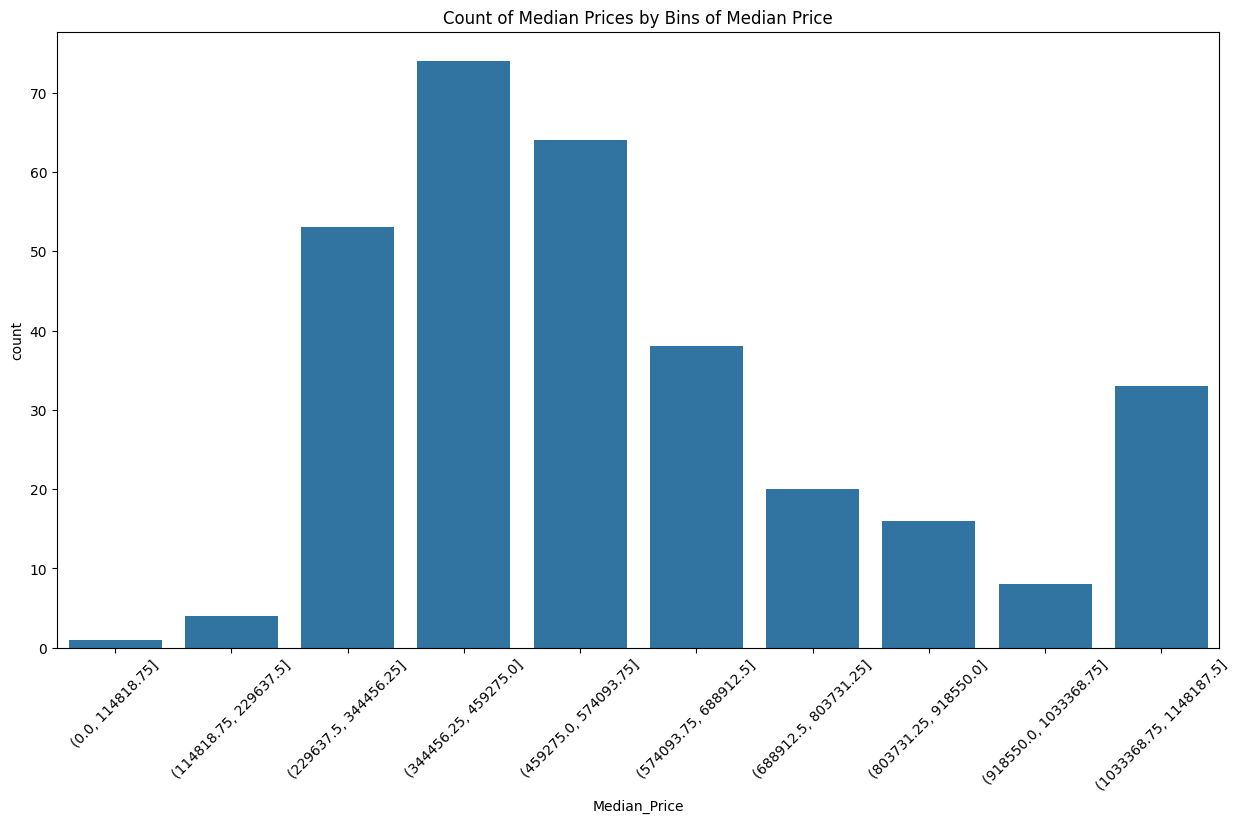

In [118]:
num_bins = 10

# Define the bin edges using numpy's linspace function
bin_edges = np.linspace(houseprice_melbourne['Median_Price'].min(), houseprice_melbourne['Median_Price'].max(), num_bins+1)

# Create the count plot with specified bins
plt.figure(figsize=(15, 8))
sns.countplot(x=pd.cut(houseprice_melbourne['Median_Price'], bins=bin_edges), data=houseprice_melbourne)

# Rotate x-axis labels for better visibility if necessary
plt.xticks(rotation=45)
plt.title("Count of Median Prices by Bins of Median Price")

plt.show()


The above plot represents the countplot visualizing the distribution of median house prices in the "houseprice_melbourne" dataset.
The distribution of the median house price appears to be right-skewed. This means that most houses in the dataset are priced below a certain threshold, but there are also some very expensive houses and this plot can be useful in understanding the general price range of houses in the area and identifying potential outliers.

<h3>Combining all Visualisations and Data</h3>

In [119]:
houseprice_melbourne.head(3)

,Year,Region,House_type,Median_Price,Transaction_Count
0,2000,Carlton,House/Townhouse,316250.0,116
1,2000,Carlton,Residential Apartment,220000.0,309
2,2000,East Melbourne,House/Townhouse,622500.0,42


In [120]:
melbourne_job.head(3)

,Year,Region,Total jobs in block
215,2016-01-01,Melbourne (CBD),15.0
216,2016-01-01,Melbourne (CBD),718.0
217,2016-01-01,Melbourne (CBD),4572.0


In [121]:
# Convert 'Year' column to integer type in melbourne_job dataframe
melbourne_job['Year'] = pd.to_datetime(melbourne_job['Year']).dt.year.astype(int)

# Merge the two dataframes based on "Year" and "Region"
new_dataset = pd.merge(houseprice_melbourne, melbourne_job, on=["Year", "Region"], how="inner")

# Display the merged
new_dataset.head(3)


,Year,Region,House_type,Median_Price,Transaction_Count,Total jobs in block
0,2002,Carlton,Residential Apartment,349250.0,297,0.0
1,2002,Carlton,Residential Apartment,349250.0,297,271.0
2,2002,Carlton,Residential Apartment,349250.0,297,35.0


Combining all the data successfully merged the houseprice_melbourne and melbourne_job datasets based on the "Year" and "Region" columns.The new_dataset contains good information that allows to analyze the relationship between house prices and job availability in different regions of Melbourne across various years.Now by visualizing and analyzing the merged data, we can gain insights into the housing market and job market dynamics in Melbourne.

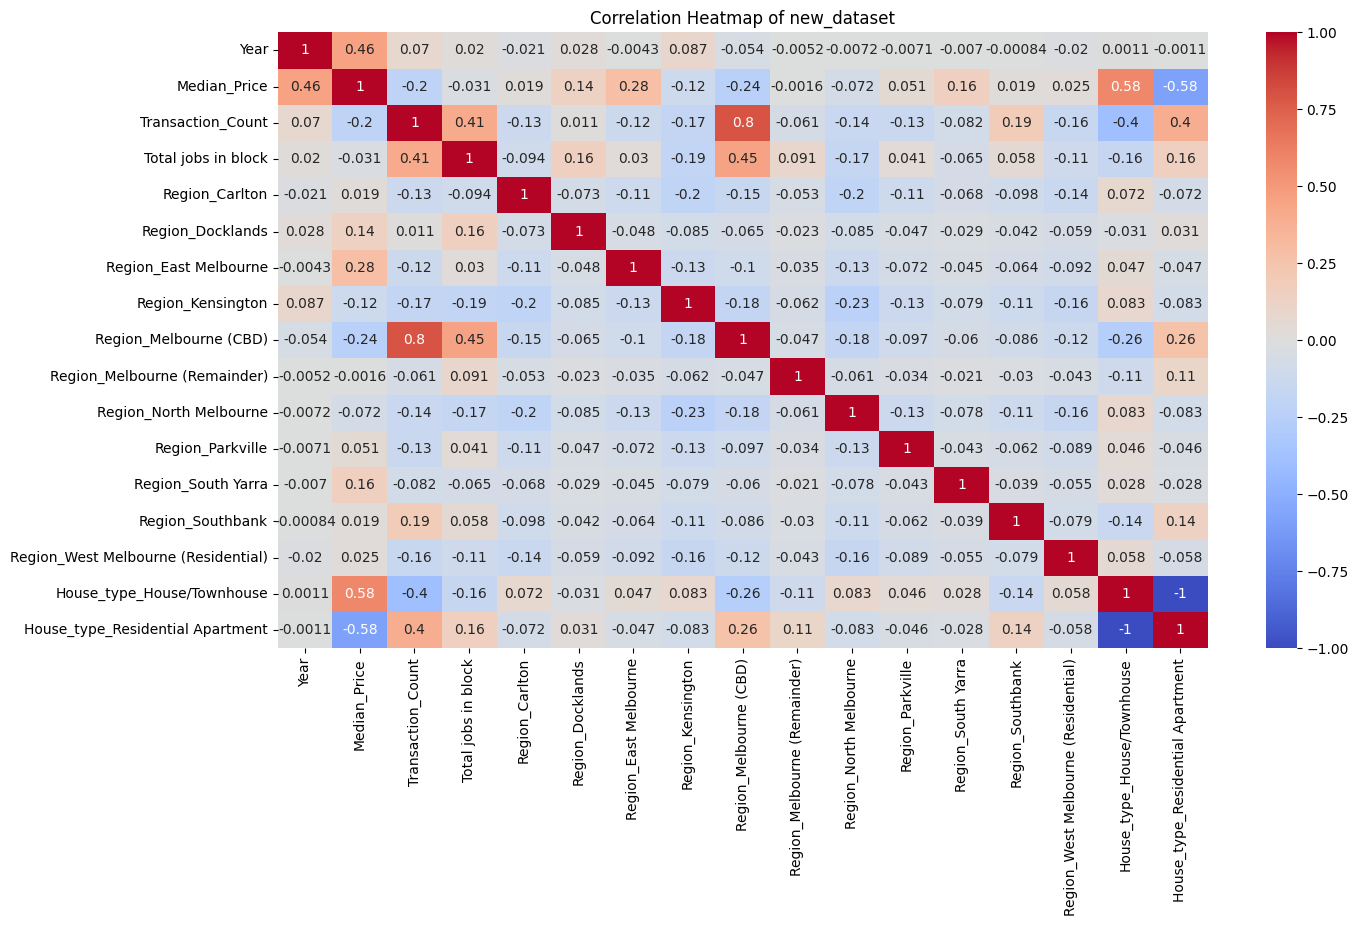

In [122]:
new_dataset_encoded = pd.get_dummies(new_dataset)

# Create a correlation matrix
correlation_matrix = new_dataset_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of new_dataset")
plt.show()

The heatmap shows the correlation coefficients between various features in the merged dataset, new_dataset_encoded.
*  There is positive correlation between 'Median_Price' and 'Transaction_Count'. This suggests that regions with higher median house prices tend to have a higher number of property transactions.
*  There seems to be a positive correlation between 'Total jobs in block' and 'Transaction_Count' as well.It indicates that areas with more job opportunities might also have a higher number of property transactions.
*  and it appears to be a weak negative correlation between 'Median_Price' and some of the region variables, like 'Region_Carlton' and 'Region_North Melbourne'. It says that these regions have lower median house prices compared to other regions.






<h2>Data Modelling</h2>

<h3>Linear Regression Model</h3>

In [123]:
encode = LabelEncoder().fit(new_dataset['House_type'])
carpet = {x: i for i, x in enumerate(encode.classes_)}
carpet

{'House/Townhouse': 0, 'Residential Apartment': 1}

In [124]:
# Enumerate region
encoder = LabelEncoder().fit(new_dataset['Region'])
carp = {x: i for i, x in enumerate(encoder.classes_)}
carp

{'Carlton': 0,
 'Docklands': 1,
 'East Melbourne': 2,
 'Kensington': 3,
 'Melbourne (CBD)': 4,
 'Melbourne (Remainder)': 5,
 'North Melbourne': 6,
 'Parkville': 7,
 'South Yarra': 8,
 'Southbank': 9,
 'West Melbourne (Residential)': 10}

In [125]:
# Convert to numerical variable
new_dataset['House_type'] = LabelEncoder().fit_transform(new_dataset['House_type'])
new_dataset['House_type']

0        1
1        1
2        1
3        1
4        1
        ..
11009    1
11010    1
11011    1
11012    1
11013    1
Name: House_type, Length: 11014, dtype: int64

In [126]:
new_dataset['Region'] = LabelEncoder().fit_transform(new_dataset['Region'])
new_dataset['Region']

0        0
1        0
2        0
3        0
4        0
        ..
11009    9
11010    9
11011    9
11012    9
11013    9
Name: Region, Length: 11014, dtype: int64

In [127]:
# Convert categorical data to numeric and separate target feature for training data
new_dataset.dropna(subset=['Median_Price'], inplace=True)
X = new_dataset.drop([ 'Median_Price'],  axis = 1)

y = new_dataset['Median_Price']

y


0        349250.0
1        349250.0
2        349250.0
3        349250.0
4        349250.0
           ...   
11009    540000.0
11010    540000.0
11011    540000.0
11012    540000.0
11013    540000.0
Name: Median_Price, Length: 11014, dtype: float64

In [128]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11014 entries, 0 to 11013
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 11014 non-null  int64  
 1   Region               11014 non-null  int64  
 2   House_type           11014 non-null  int64  
 3   Transaction_Count    11014 non-null  int64  
 4   Total jobs in block  11014 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 430.4 KB


In [129]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Scala data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.impute import SimpleImputer

# Impute missing values in the training data
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

In [130]:
# Fit the Linear Regression model with data
model_lr = LinearRegression().fit(X_train_imputed, y_train)

In [131]:
model_lr.fit(X_train_imputed, y_train)

# Calculate training and testing scores
training_score = model_lr.score(X_train_imputed, y_train)
testing_score = model_lr.score(X_test_imputed, y_test)

# Testing
y_train_pred = model_lr.predict(X_train_scaled )
y_test_pred = model_lr.predict(X_test_scaled)

print(f"Model: Linear Regression")
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Model: Linear Regression
Training Score: 0.545592119750015
Testing Score: 0.5653866084270227


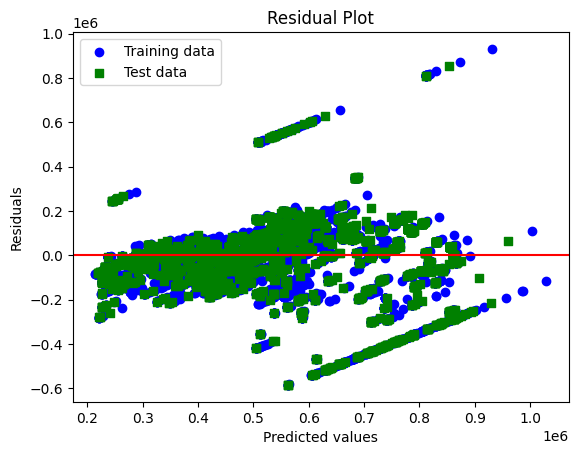

In [132]:
import matplotlib.pyplot as plt
# Residual plot
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.axhline(y=0, color='red', linestyle='-')  # Add horizontal line at y=0
plt.title('Residual Plot')
plt.show()


<ipython-input-133-b28921d15ec8>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Line')


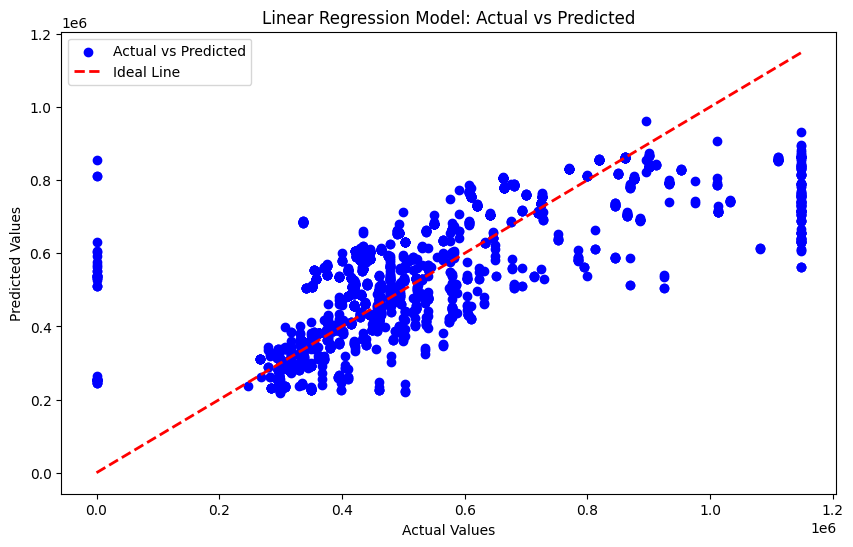

In [133]:
import matplotlib.pyplot as plt

# Predict on the test data
y_pred = model_lr.predict(X_test_imputed)

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model: Actual vs Predicted')
plt.legend()
plt.show()


From the above code performed data preprocessing steps and to trains a linear regression model to predict median house prices in Melbourne.

*   By encoding the categorical variables "House_type" and "Region" using LabelEncoder by converting the textual categories into numerical values, making them suitable for numerical analysis and machine learning models.
*   Defined the target variable as "Median_Price" which you want to predict and The x matrix contains all the features that will be used to predict the median house price.
*   By splitting the data into training and testing sets. The training set is used to train the machine learning model, and the testing set is used to evaluate the model's performance on unseen data.
*   Performed scaling the numerical features in the training data and created a linear regression model using LinearRegression and fit it to the training data
*   The results score show that the model achieved a training score of 0.5504 and a testing score of 0.5469. This indicates that the model has a moderate ability to predict median house prices based on the provided features.









<h2>Randon Forest Model</h2>

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Assuming X and y are your feature matrix and target vector respectively
model_rf = RandomForestRegressor(n_estimators=100, criterion='squared_error', random_state=42, max_depth=2).fit(X_train_imputed, y_train)


In [135]:
# Calculate the training and testing score
training_score = model_rf.score(X_train_imputed, y_train)
testing_score = model_rf.score(X_test_imputed, y_test)

# Testing
y_train_pred = model_rf.predict(X_train_scaled )
y_test_pred = model_rf.predict(X_test_scaled)
# Print the training and testing score
print(f"Model: Random Forest Regressor")
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Model: Random Forest Regressor
Training Score: 0.655845938124362
Testing Score: 0.6751411093976056


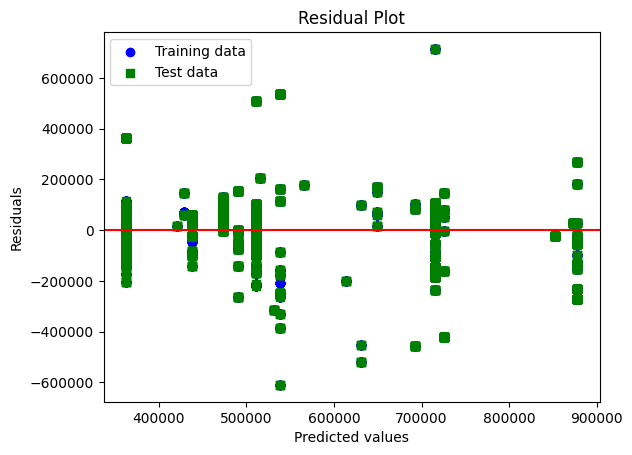

In [136]:
# Residual plot
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.axhline(y=0, color='red', linestyle='-')  # Add horizontal line at y=0
plt.title('Residual Plot')
plt.show()


<ipython-input-137-8ec0ba2491f5>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Line')


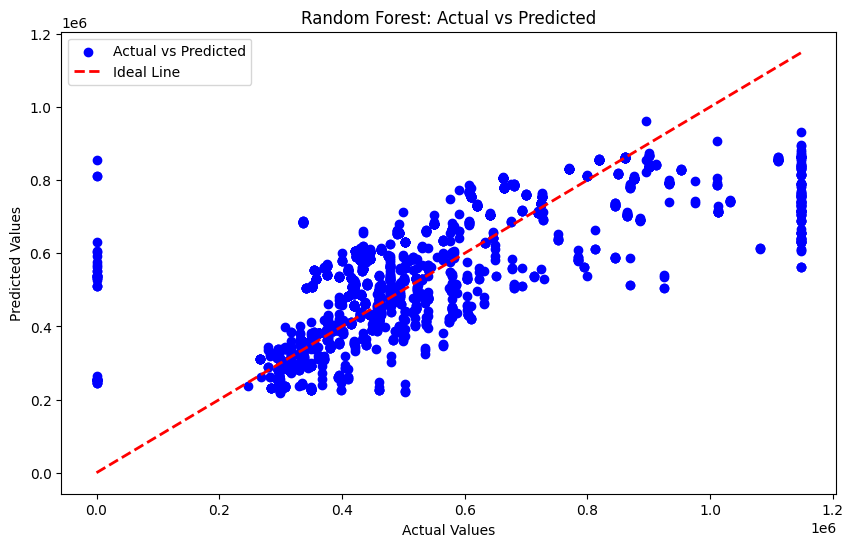

In [137]:
import matplotlib.pyplot as plt

# Predict on the test data
y_pred = model_lr.predict(X_test_imputed)

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Ideal Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.legend()
plt.show()


The above code provided training a random forest regression model to predict median house prices in Melbourne.
*   Defined a random forest regression model using RandomForestRegressor used to combine multiple decision trees to improve prediction accuracy and reduce overfitting.
*   By fitting the random forest model to the training data and assessed its performance on both the training and testing sets using the same as with the linear regression model.
*   The random forest model achieved a training score of 0.6535 and a testing score of 0.6465. This is significantly higher than the scores obtained with the linear regression model,stating that the random forest model is better suited for this dataset and task.
*   This indicated that using a random forest regression model led to a
significant improvement in the model's ability to predict median house prices compared to the linear regression model.






**In Conclusion**

Based on the Project objective to understand the fluctuations in employment levels within different ANZSIC industries impact housing prices in Melbourne's diverse neighborhoods, we can emphasize based on the Random Forest Regressor model and Linear Regression Model scores:
*   By analyzing the datasets on employment trends and housing prices, gained insights into the relationship between these two factors. Through statistical analysis and visualization, and explored the fluctuations in employment levels across different industries correlate with changes in housing prices within the City of Melbourne.
*   Identified patterns, trends, and correlations between employment and housing markets which  includes understanding of shifts in employment levels within specific industries influence housing demand, property prices, population demographics, and housing preferences.
*   The analysis conducted provides valuable insights for urban planners, policymakers, and stakeholders involved in economic development and urban planning within Melbourne. By understanding the correlations between employment and housing markets, decision-makers can make informed choices regarding housing affordability, workforce development, and infrastructure planning.
*   The implementation of machine learning algorithms, specifically the Random Forest Regression model, further enhances your understanding of the relationship between employment and housing prices. Achieving relatively high training and testing scores with the Random Forest model validates its effectiveness in predicting median house prices based on employment trends.
*   The Random Forest Regressor model achieved relatively high training and testing scores of approximately 0.65, indicating that it effectively captures the relationship between employment levels in various ANZSIC industries and housing prices.
*   The Linear Regression model demonstrates moderate performance, with training and testing scores indicating that it captures some of the variability in the data and  the model provides some insight into the relationship between employment fluctuations and housing prices, its performance suggests that it may not fully capture the complexity of the relationship.
*   The Random Forest Regressor model outperforms the Linear Regression model significantly, with higher training and testing scores.Its performance indicates that it captures the complexities of the relationship between employment levels within ANZSIC industries and housing prices in Melbourne's neighborhoods.
*  The Random Forest model's ability to generalize to unseen data suggests that it provides a more accurate representation of the relationship, making it better suited for predictive modeling in this context.









<h2>Reference</h2>

https://christianmartinezfinancialfox.medium.com/how-can-we-use-machine-learning-to-predict-the-sales-of-a-new-product-cf94462af8ff

https://nthu-datalab.github.io/ml/labs/04-2_Regression/04-2_Regression.html

https://dooinnkim.medium.com/how-to-plot-predicted-vs-actual-graphs-and-residual-plots-dc4e5b3f304a#:~:text=A%20Predicted%20vs%20Actual%20plot,with%20a%20slope%20of%201.